In [1]:
#!pip install --user pandas==1.0.3
import numpy as np
import pandas as pd # library for data analsysis
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests 
from pandas import DataFrame

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.exc import GeocoderTimedOut
import requests # library to handle requests 


#!pip install matplotlib # data visualization tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime as dt
import matplotlib.dates as mdates

#!conda install -c conda-forge folium=0.5.0 --yes 
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Preprocessing data

Data diambil menggunakan API publik untuk Pusat Informasi dan Koordinasi COVID-19 Provinsi Jawa Barat. (https://covid19-public.digitalservice.id/api/v1/)

## Data Akumulatif Kasus Covid-19 di Jawa Barat

In [2]:
url_rekap_prov = 'https://covid19-public.digitalservice.id/api/v1/rekapitulasi/jabar/kumulatif?level=prov'
data_rekap_prov = requests.get(url_rekap_prov).json()

data_rekap_prov
df_rekap_prov = pd.json_normalize(data=data_rekap_prov['data'], record_path=["content"]) 

df_rekap_prov.head()

,tanggal,kode_prov,nama_prov,odp,odp_proses,odp_selesai,pdp,pdp_proses,pdp_selesai,positif,sembuh,meninggal
0,2020-03-06,32,Jawa Barat,285,154,131,43,19,24,4,0,0
1,2020-03-07,32,Jawa Barat,487,240,247,48,24,24,4,0,0
2,2020-03-08,32,Jawa Barat,487,240,247,48,24,24,5,0,0
3,2020-03-09,32,Jawa Barat,535,319,216,50,28,22,5,0,0
4,2020-03-10,32,Jawa Barat,594,363,231,54,27,27,6,0,0


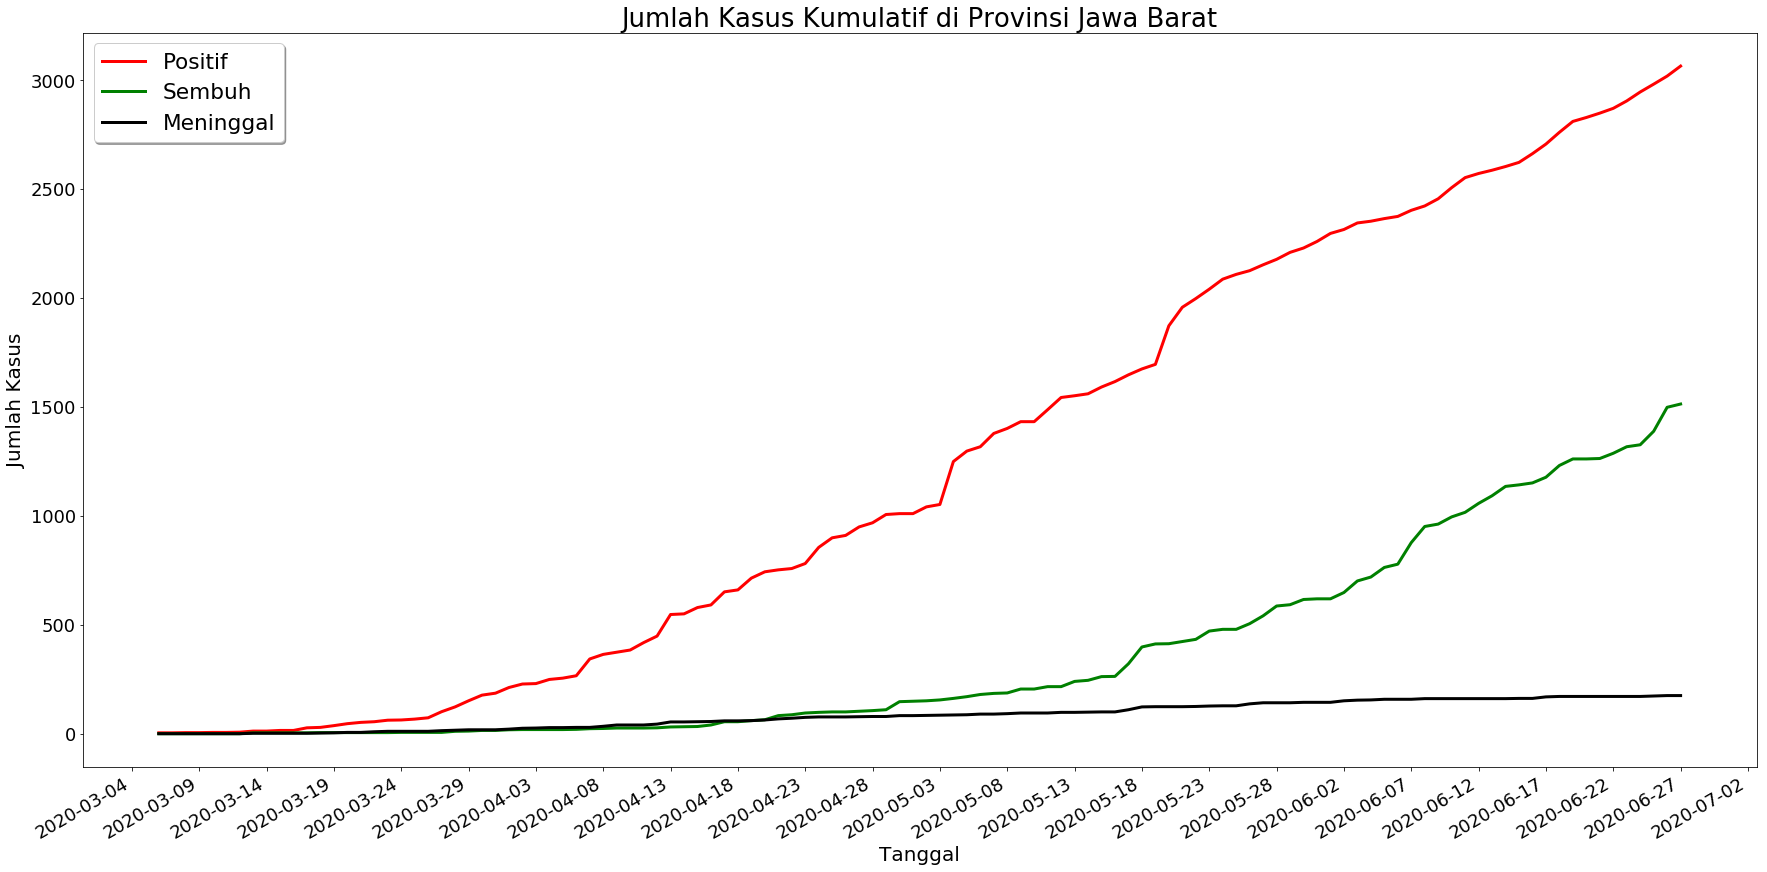

In [3]:
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df_rekap_prov["tanggal"]]
y1 = df_rekap_prov["positif"]
y2 = df_rekap_prov["sembuh"]
y3 = df_rekap_prov["meninggal"]

plt.rcParams["figure.figsize"]=30,15
plt.rcParams["font.size"]=18

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(x,y1,color='red',linewidth=3,label='Positif')
plt.plot(x,y2,color='green',linewidth=3,label='Sembuh')
plt.plot(x,y3,color='black',linewidth=3,label='Meninggal')
plt.title('Jumlah Kasus Kumulatif di Provinsi Jawa Barat', fontsize='x-large')
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Jumlah Kasus', fontsize=20)
legend = plt.legend(loc='upper left', shadow=True, fontsize='large')
plt.gcf().autofmt_xdate()
legend.get_frame().set_facecolor('white')

## Data Akumulatif Kasus Covid-19 di Kota dan Kabupaten, Jawa Barat

In [4]:
url_wilayah = 'https://covid19-public.digitalservice.id/api/v1/wilayah/jabar?level=kabupaten'
data_wilayah = requests.get(url_wilayah).json()

df_wilayah = pd.json_normalize(data_wilayah, 
                            record_path='data') 

df_wilayah.head()

,kode_kemendagri,kode_bps,nama_wilayah,tingkat_wilayah,parent_kemendagri,parent_bps,latitude,longitude
0,32.04,3204,KAB. BANDUNG,2,null,0,-7.100,107.611
1,32.17,3217,KAB. BANDUNG BARAT,2,null,0,-6.897,107.415
2,32.16,3216,KAB. BEKASI,2,null,0,-6.215,107.121
3,32.01,3201,KAB. BOGOR,2,null,0,-6.560,106.768
4,32.07,3207,KAB. CIAMIS,2,null,0,-7.291,108.429


In [5]:
url_rekapitulasi = 'https://covid19-public.digitalservice.id/api/v1/rekapitulasi/jabar?level=kab'
data_rekapitulasi = requests.get(url_rekapitulasi).json()

df_rekapitulasi = pd.json_normalize(data=data_rekapitulasi['data'], 
                                    record_path=["content"]) 

df_rekapitulasi.head()

,kode_prov,nama_prov,kode_kab,nama_kab,odp_proses,odp_selesai,odp_total,pdp_proses,pdp_selesai,pdp_total,positif,sembuh,meninggal
0,32,Jawa Barat,3204,Kabupaten Bandung,27,1691,1718,23,441,464,106,73,5
1,32,Jawa Barat,3217,Kabupaten Bandung Barat,0,742,742,0,33,33,78,50,3
2,32,Jawa Barat,3216,Kabupaten Bekasi,68,3663,3731,61,1176,1237,216,174,20
3,32,Jawa Barat,3201,Kabupaten Bogor,259,1431,1690,469,1475,1944,273,51,8
4,32,Jawa Barat,3207,Kabupaten Ciamis,4,1973,1977,11,71,82,13,7,1


In [6]:
df_final = pd.concat([df_rekapitulasi, df_wilayah], axis=1)
df_final = df_final.drop(columns=["kode_prov","nama_prov","kode_kemendagri","nama_wilayah","tingkat_wilayah","parent_kemendagri","parent_bps","kode_bps"])

df_final.head()

,kode_kab,nama_kab,odp_proses,odp_selesai,odp_total,pdp_proses,pdp_selesai,pdp_total,positif,sembuh,meninggal,latitude,longitude
0,3204,Kabupaten Bandung,27,1691,1718,23,441,464,106,73,5,-7.100,107.611
1,3217,Kabupaten Bandung Barat,0,742,742,0,33,33,78,50,3,-6.897,107.415
2,3216,Kabupaten Bekasi,68,3663,3731,61,1176,1237,216,174,20,-6.215,107.121
3,3201,Kabupaten Bogor,259,1431,1690,469,1475,1944,273,51,8,-6.560,106.768
4,3207,Kabupaten Ciamis,4,1973,1977,11,71,82,13,7,1,-7.291,108.429


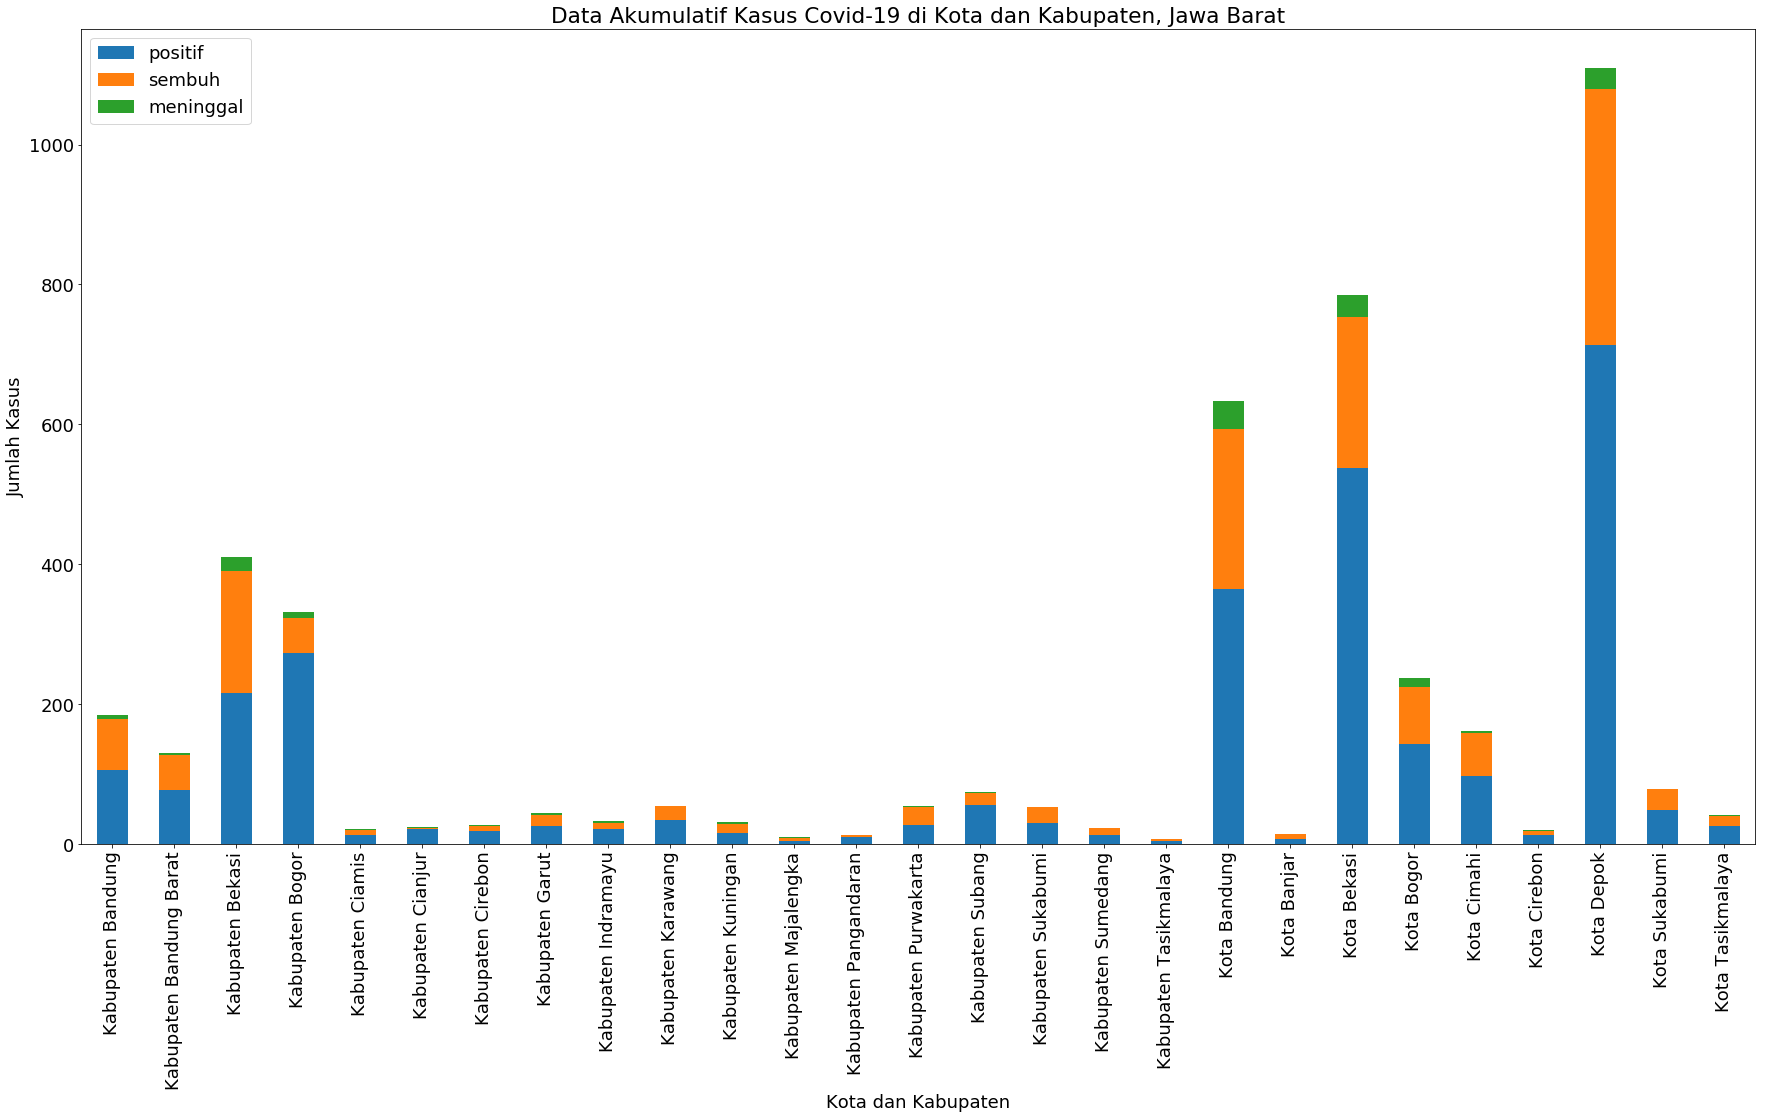

In [7]:
df_final_bar = df_final.set_index('nama_kab')
df_final_bar = df_final_bar.drop(columns=["kode_kab","odp_proses","odp_selesai","odp_total","pdp_proses","pdp_selesai","pdp_total","latitude","longitude"])
plt_final = df_final_bar.plot(kind="bar",stacked="true")
plt_final.set_xlabel("Kota dan Kabupaten")
plt_final.set_ylabel("Jumlah Kasus")
plt_final.set_title("Data Akumulatif Kasus Covid-19 di Kota dan Kabupaten, Jawa Barat")
plt_final

## Data Persebaran Kasus Covid-19 di Jawa Barat

In [8]:
#Mendapatkan koordinat Jawa Barat menggunakan library geopy
address = 'West Java, Indonesia'

geolocator = Nominatim(user_agent="northwest_explorer")
location = geolocator.geocode(address) 
latitude = location.latitude
longitude = location.longitude
print('Koordinat latitude dan longitude dari Jawa Barat adalah {}, {}.'.format(latitude, longitude))

Koordinat latitude dan longitude dari Jawa Barat adalah -6.8891904, 107.6404716.


In [9]:
# Membuat peta
m = folium.Map(location=[latitude, longitude], zoom_start=9)
for index, row in df_final.iterrows():
    if row['positif'] >= 500:
        marker_color = 'darkred'
        fill_color = 'darkred'
    elif row['positif'] >= 300:
        marker_color = 'darkred'
        fill_color = 'red'
    elif row['positif'] >= 100:
        marker_color = 'darkred'
        fill_color = 'orange'
    else:
        marker_color='darkred'
        fill_color = 'yellow'
    
    folium.Circle(
          location=[row['latitude'], row['longitude']],
          popup=row['nama_kab'],
          tooltip=row['nama_kab'],
          radius=row['positif']*50,
          color=marker_color,
          fill=True,
          fill_color=fill_color,
          fill_opacity=0.7
       ).add_to(m)

m